###### ![image.png](https://www.patriotsoftware.com/wp-content/uploads/2019/09/cost-of-living-by-state-1.jpg)

# Global Cost of Living

The cost of living is a measure of how much someone living in a certain area needs to earn in order to live their life comfortably. Higher costs of living can be attributed to inflation. In Excel, I created the Continent column by using vlookup.

#### Research Questions
1. What country has the highest cost of living for different items?
2. Does cost of living change for different continents?
3. Does the cost of certain items affect the cost of others?
4. Does the average mortgage rate affect the cost of homes/apartments? (something along the lines of housing)

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline
plt.style.use('ggplot')
df = pd.read_csv('./data/cost_of_living.csv', encoding = 'unicode_escape')

### First Five Countries and their Respective Costs

In [18]:
df.head()

,Unnamed: 0,city,country,Continent,"Meal, Inexpensive Restaurant (USD)","Meal for 2 People, Mid-range Restaurant, Three-course (USD)",McMeal at McDonalds (or Equivalent Combo Meal) (USD),"Domestic Beer (0.5 liter draught, in restaurants) (USD)","Imported Beer (0.33 liter bottle, in restaurants) (USD)","Cappuccino (regular, in restaurants) (USD)",...,1 Pair of Men Leather Business Shoes (USD),Apartment (1 bedroom) in City Centre (USD),Apartment (1 bedroom) Outside of Centre (USD),Apartment (3 bedrooms) in City Centre (USD),Apartment (3 bedrooms) Outside of Centre (USD),Price per Square Meter to Buy Apartment in City Centre (USD),Price per Square Meter to Buy Apartment Outside of Centre (USD),Average Monthly Net Salary (After Tax) (USD),"Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate",data_quality
0,0,Delhi,India,Asia,4.90,22.04,4.28,1.84,3.67,1.78,...,36.26,223.87,133.38,596.16,325.82,2619.46,1068.90,586.35,7.96,1
1,1,Shanghai,China,Asia,5.59,40.51,5.59,1.12,4.19,3.96,...,121.19,1080.07,564.30,2972.57,1532.23,17333.09,9174.88,1382.83,5.01,1
2,2,Jakarta,Indonesia,Asia,2.54,22.25,3.50,2.02,3.18,2.19,...,80.32,482.85,270.15,1117.69,584.37,2694.05,1269.44,483.19,9.15,1
3,3,Manila,Philippines,Asia,3.54,27.40,3.54,1.24,1.90,2.91,...,61.82,559.52,281.78,1754.40,684.81,3536.04,2596.44,419.02,7.80,1
4,4,Seoul,South Korea,Asia,7.16,52.77,6.03,3.02,4.52,3.86,...,108.30,809.83,583.60,2621.05,1683.74,21847.94,10832.90,2672.23,3.47,1


### Checking Data Types

In [19]:
df.dtypes

Unnamed: 0                                                                          int64
city                                                                               object
country                                                                            object
Continent                                                                          object
Meal, Inexpensive Restaurant (USD)                                                float64
Meal for 2 People, Mid-range Restaurant, Three-course (USD)                       float64
McMeal at McDonalds (or Equivalent Combo Meal) (USD)                              float64
Domestic Beer (0.5 liter draught, in restaurants) (USD)                           float64
Imported Beer (0.33 liter bottle, in restaurants) (USD)                           float64
Cappuccino (regular, in restaurants) (USD)                                        float64
Coke/Pepsi (0.33 liter bottle, in restaurants) (USD)                              float64
Water (0.3

All data types are the correct type for the numbers/categories are displaying.

### Deleting Columns That I Won't Use

In [20]:
del df['Unnamed: 0']
del df['data_quality']

The unnamed column listed the index of each city. The data quality column listed if there were enough data values filled in for the city to have usable data.

### Statistics

In [21]:
df.corr()

C:\Users\lmcnaboe\AppData\Local\Temp\ipykernel_880\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,"Meal, Inexpensive Restaurant (USD)","Meal for 2 People, Mid-range Restaurant, Three-course (USD)",McMeal at McDonalds (or Equivalent Combo Meal) (USD),"Domestic Beer (0.5 liter draught, in restaurants) (USD)","Imported Beer (0.33 liter bottle, in restaurants) (USD)","Cappuccino (regular, in restaurants) (USD)","Coke/Pepsi (0.33 liter bottle, in restaurants) (USD)","Water (0.33 liter bottle, in restaurants) (USD)","Milk (regular), (1 liter) (USD)",Loaf of Fresh White Bread (500g) (USD),...,1 Pair of Nike Running Shoes (Mid-Range) (USD),1 Pair of Men Leather Business Shoes (USD),Apartment (1 bedroom) in City Centre (USD),Apartment (1 bedroom) Outside of Centre (USD),Apartment (3 bedrooms) in City Centre (USD),Apartment (3 bedrooms) Outside of Centre (USD),Price per Square Meter to Buy Apartment in City Centre (USD),Price per Square Meter to Buy Apartment Outside of Centre (USD),Average Monthly Net Salary (After Tax) (USD),"Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate"
"Meal, Inexpensive Restaurant (USD)",1.000000,0.782689,0.703077,0.672912,0.615536,0.632348,0.742485,0.694520,0.133434,0.623601,...,0.269341,0.506020,0.611300,0.654945,0.550079,0.630887,0.186942,0.270781,0.696176,-0.383919
"Meal for 2 People, Mid-range Restaurant, Three-course (USD)",0.782689,1.000000,0.720239,0.700957,0.645351,0.655319,0.770848,0.740990,0.218274,0.624471,...,0.309952,0.552349,0.625465,0.652393,0.590656,0.646624,0.238635,0.338082,0.692396,-0.407404
McMeal at McDonalds (or Equivalent Combo Meal) (USD),0.703077,0.720239,1.000000,0.660785,0.592969,0.588184,0.743043,0.728792,0.219967,0.592431,...,0.300796,0.507886,0.512535,0.536764,0.458326,0.512228,0.245068,0.325086,0.612721,-0.384909
"Domestic Beer (0.5 liter draught, in restaurants) (USD)",0.672912,0.700957,0.660785,1.000000,0.818133,0.670111,0.698497,0.661797,0.163271,0.596150,...,0.191908,0.444671,0.597053,0.631955,0.524051,0.590631,0.233390,0.317789,0.683762,-0.426520
"Imported Beer (0.33 liter bottle, in restaurants) (USD)",0.615536,0.645351,0.592969,0.818133,1.000000,0.716632,0.598204,0.566962,0.184007,0.637176,...,0.181135,0.392446,0.610191,0.631751,0.546555,0.604673,0.235673,0.306405,0.668041,-0.332017
"Cappuccino (regular, in restaurants) (USD)",0.632348,0.655319,0.588184,0.670111,0.716632,1.000000,0.616233,0.623234,0.247429,0.723626,...,0.227525,0.427691,0.646178,0.676445,0.593120,0.649763,0.204592,0.271907,0.746720,-0.321621
"Coke/Pepsi (0.33 liter bottle, in restaurants) (USD)",0.742485,0.770848,0.743043,0.698497,0.598204,0.616233,1.000000,0.863334,0.132311,0.618919,...,0.277431,0.538062,0.549055,0.587612,0.503795,0.567379,0.219079,0.297680,0.665584,-0.465515
"Water (0.33 liter bottle, in restaurants) (USD)",0.694520,0.740990,0.728792,0.661797,0.566962,0.623234,0.863334,1.000000,0.109549,0.614048,...,0.246222,0.513790,0.556552,0.584467,0.521388,0.565759,0.236575,0.328307,0.697398,-0.448682
"Milk (regular), (1 liter) (USD)",0.133434,0.218274,0.219967,0.163271,0.184007,0.247429,0.132311,0.109549,1.000000,0.234520,...,0.231030,0.272608,0.150824,0.138623,0.185179,0.158646,0.218130,0.249889,0.116723,-0.103100
Loaf of Fresh White Bread (500g) (USD),0.623601,0.624471,0.592431,0.596150,0.637176,0.723626,0.618919,0.614048,0.234520,1.000000,...,0.183511,0.424741,0.630168,0.672365,0.584644,0.643668,0.186409,0.258701,0.721530,-0.300431


The restaurant costs and the drink costs had the highest correlation.

### Important Statistics of the Dataset

In [22]:
df.describe()

,"Meal, Inexpensive Restaurant (USD)","Meal for 2 People, Mid-range Restaurant, Three-course (USD)",McMeal at McDonalds (or Equivalent Combo Meal) (USD),"Domestic Beer (0.5 liter draught, in restaurants) (USD)","Imported Beer (0.33 liter bottle, in restaurants) (USD)","Cappuccino (regular, in restaurants) (USD)","Coke/Pepsi (0.33 liter bottle, in restaurants) (USD)","Water (0.33 liter bottle, in restaurants) (USD)","Milk (regular), (1 liter) (USD)",Loaf of Fresh White Bread (500g) (USD),...,1 Pair of Nike Running Shoes (Mid-Range) (USD),1 Pair of Men Leather Business Shoes (USD),Apartment (1 bedroom) in City Centre (USD),Apartment (1 bedroom) Outside of Centre (USD),Apartment (3 bedrooms) in City Centre (USD),Apartment (3 bedrooms) Outside of Centre (USD),Price per Square Meter to Buy Apartment in City Centre (USD),Price per Square Meter to Buy Apartment Outside of Centre (USD),Average Monthly Net Salary (After Tax) (USD),"Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate"
count,4449.000000,4432.000000,4552.000000,4385.000000,4445.000000,4540.000000,4438.000000,4571.000000,4494.000000,4457.000000,...,4388.000000,4337.000000,3533.000000,3465.000000,3418.000000,3385.000000,2681.000000,2609.000000,3459.000000,3894.000000
mean,10.321643,43.213592,6.875426,3.376732,3.937287,2.742822,1.513053,1.110768,1.139455,1.605277,...,76.389164,85.420108,710.696156,559.472898,1252.427627,973.603867,3207.173025,2323.089766,1817.033501,6.527214
std,7.165507,25.365827,2.669017,2.080606,2.088773,1.353734,0.905525,0.749957,0.513458,1.079458,...,33.281138,40.328050,650.404203,529.592777,1222.803640,926.552107,6222.564176,3536.720519,1626.482870,5.423472
min,0.450000,3.250000,1.060000,0.320000,0.310000,0.220000,0.110000,0.070000,0.260000,0.050000,...,7.920000,7.570000,21.690000,12.200000,61.200000,27.110000,109.530000,48.010000,18.000000,0.600000
25%,4.310000,22.350000,4.910000,1.590000,2.220000,1.560000,0.750000,0.470000,0.820000,0.790000,...,61.550000,57.620000,254.440000,168.970000,465.720000,325.920000,1118.030000,778.890000,478.255000,3.000000
50%,9.830000,40.000000,6.960000,3.000000,3.640000,2.630000,1.450000,1.040000,1.040000,1.310000,...,74.525000,83.100000,519.350000,400.000000,934.000000,720.710000,2077.390000,1558.040000,1298.370000,5.210000
75%,15.000000,60.000000,8.500000,5.000000,5.190000,3.722500,2.080000,1.570000,1.300000,2.200000,...,88.222500,106.670000,986.760000,791.670000,1700.000000,1367.330000,3782.820000,2796.500000,2742.500000,8.497500
max,56.980000,211.350000,21.810000,15.000000,17.500000,10.000000,8.000000,5.770000,6.810000,8.810000,...,923.120000,542.740000,12608.830000,8989.370000,27006.110000,17868.180000,237522.540000,79174.180000,12681.260000,61.330000


### Simple Plots of Variables that had Correlation

<AxesSubplot:xlabel='Coke/Pepsi (0.33 liter bottle, in restaurants) (USD)', ylabel='Water (0.33 liter bottle, in restaurants) (USD)'>

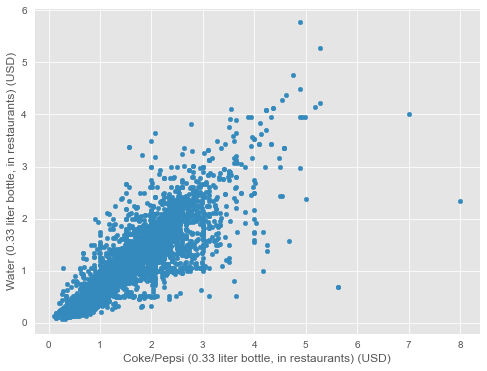

In [51]:
df.plot.scatter(x = 'Coke/Pepsi (0.33 liter bottle, in restaurants) (USD)', 
                y = 'Water (0.33 liter bottle, in restaurants) (USD)', figsize=(8,6))
# These two categories have one of the highest correlations

The cost of all drinks in restaurants seem to go up, not just water or soda.

(0.0, 200.0)

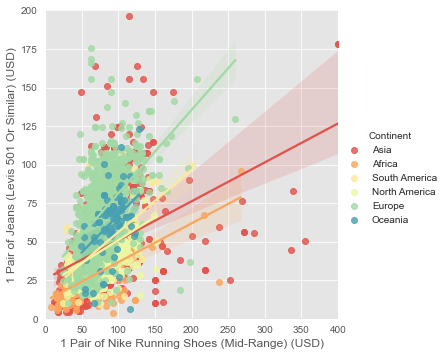

In [46]:
sns.lmplot(x='1 Pair of Nike Running Shoes (Mid-Range) (USD)', y='1 Pair of Jeans (Levis 501 Or Similar) (USD)', 
           data=df, hue= 'Continent', palette = 'Spectral')
plt.xlim(0,400)
plt.ylim(0,200)

Asia has very sporadic pricing for clothes, while Europe, Oceania, and North America all have a relatively tight line of best fit.

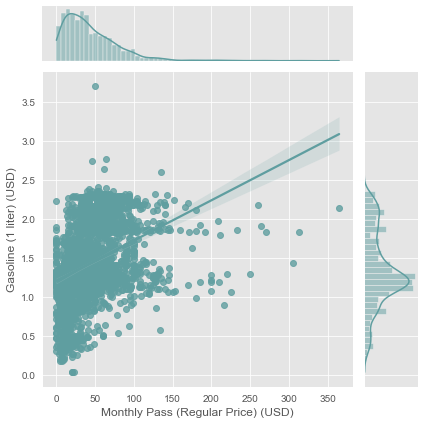

In [49]:
my_color = (95/255, 158/255, 160/255, 1)
sns.jointplot(x='Monthly Pass (Regular Price) (USD)', y='Gasoline (1 liter) (USD)', data=df, color = my_color, kind = 'reg')

The cost of monthly public transportation passes does not have a correlation with the cost of gasoline. Most monthly passes seem to hover around the same price (< 100 dollars), besides some outliers. Gas also seems to be in the same range (25¢-$2.50).